## Example

### 1. Load dependencies

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from KMeans import KMeans

### 2. Some theorecital notes

#### Algorithm

K-Means clusters unlabeled data into K clusters. 

INPUT: data $X[n_{samples}, m_{features}]$; value of $k$ (number of clusters)

DO:

1. Pick $k$ random points as cluster centers called 'centroids'
2. Assign each $x_i$ to nearest cluster by calculating its distance to each centroid
3. Find new cluster center by taking the average of the assigned to current cluster points
4. Repeat Step 2 and 3 until none of the cluster assignments change (or iter limit reached)




**Step 1**

Randomly generate $k$ centroids, (C is the set of all centroids).
$$ c_1, c_2, …, c_k  \in   C $$


**Step 2**

Assign each input value to closest center. This is done mostly by calculating squared Euclidean norm of the difference between the point and the each centroid (generally, Minkowski distance could be used as well) :
$$\arg \min_{c_i \in C} ||x - c_i||.$$


**Step 3**

Finding the new centroid by taking the average of all the points assigned to that cluster:
$$c_i = \frac{1}{\lvert S_i \rvert}\sum_{x_i \in S_i} x_i,$$

$S_i$ is the set of all points assigned to the $i_{th}$ cluster.


**Step 4**

Repeating *Step 2* and *Step 3* until none of the cluster assignments are changed / convergence limit reached / max iterations count exceeded.


### 3. Generate data

In [2]:
# data
sh = (100, 2)
x1 = np.random.normal(-2, (0.5, 0.1), sh)
x2 = np.random.normal(0, (0.33, 0.5), sh)
x3 = np.random.normal(2, 0.5, sh)
x4 = np.random.normal((-2, 2), (0.1, 0.5), sh)
x5 = np.random.normal((0, 2), (0.5, 0.5), sh)

x = np.vstack([x1,x2,x3, x4, x5])
y = np.array([0] * sh[0] + [1] * sh[0] + [2] * sh[0] + [3] * sh[0] + [4] * sh[0])
x.shape

(500, 2)

### 4. Model 

#### 4.1 Create & fit

In [3]:
# create
km = KMeans(clusters=5,  # num of clusters
             distance_order=1,  # p power value for Minkowski norm (1 ~ Manhattan, 2 ~ euclidean, ...)
             nruns=15,  # number of algorithm runs with different initialization, choose best result
             max_iter=1000,  # iter limitation
             random_seed = 42 # random seed for generator
             )

In [4]:
# fit
clusters_, score_ = km.fit(x)
clusters_, score_

(array([[ 1.97498169,  1.91869979],
        [-0.00511035, -0.04379115],
        [-1.98529332,  2.00290652],
        [-2.08116783, -1.97876035],
        [-0.03605737,  1.92310521]]),
 0.7542451499651918)

#### 4.2 Visualize results

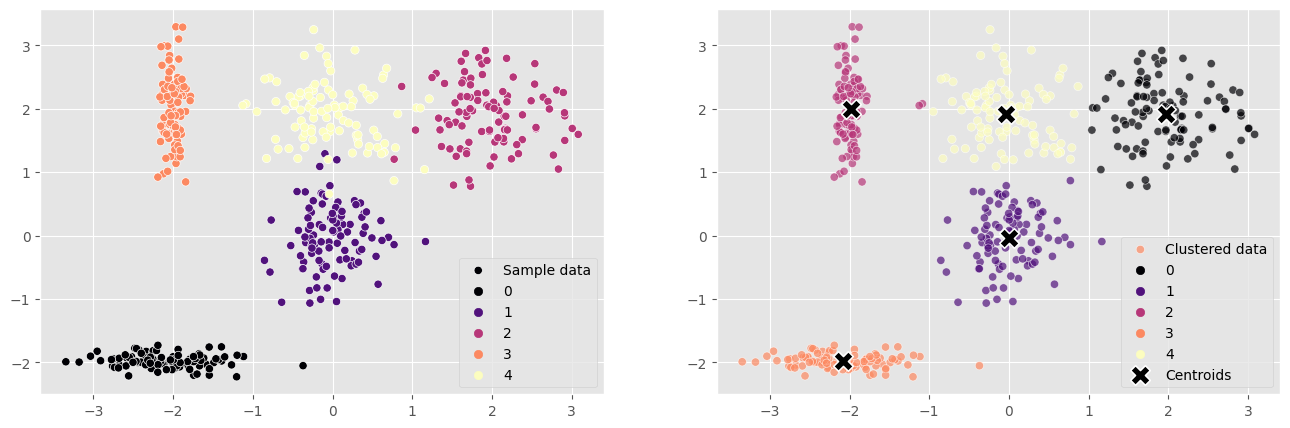

In [11]:
# plotting
fg, ax = plt.subplots(1,2, figsize=(16, 5), dpi=100)
# draw sample data
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y, palette='magma', label='Sample data', ax=ax[0])
# draw labeled data
sns.scatterplot(x=x[:,0], y=x[:,1], hue=km.predict(x),alpha = 0.7, palette='magma', label='Clustered data', ax=ax[1])
# draw clusters
sns.scatterplot(x=clusters_[:, 0], y=clusters_[:, 1], marker='X', s=200, color='k', label='Centroids', ax=ax[1])

for axi in ax: axi.legend()

#### 4.3 Elbow method, Silhouette score metric

In [12]:
scores, inertias = [], [] 
rng = list(range(2, 10))
for k in rng:
    kmns = KMeans(clusters=k,distance_order=1,nruns=10, max_iter=1000,random_seed=32)
    _, score = kmns.fit(x) # fit & save score
    scores.append(score) 
    inertias.append(kmns.get_inertia()) # get inertia

Text(0, 0.5, 'metric value')

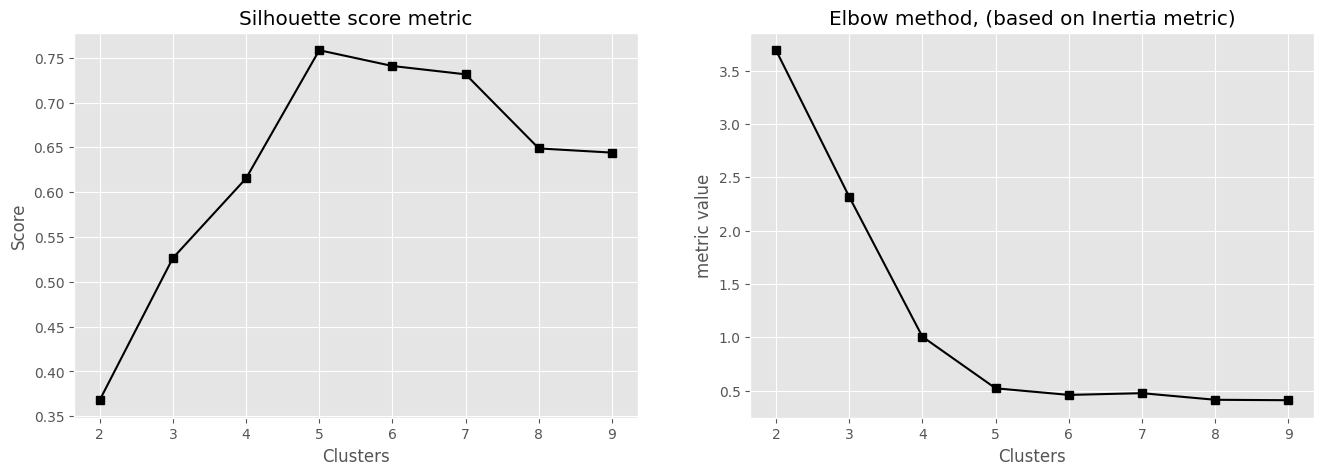

In [13]:
fg, ax = plt.subplots(1,2, figsize=(16, 5), dpi=100)

ax[0].plot(rng, scores, 'ks-')
ax[1].plot(rng, inertias, 'ks-')

ax[0].set_title("Silhouette score metric")
ax[0].set_xlabel("Clusters")
ax[0].set_ylabel("Score")
ax[1].set_title("Elbow method, (based on Inertia metric)")
ax[1].set_xlabel("Clusters")
ax[1].set_ylabel("metric value")